In [ ]:
from google.colab import drive
from google.colab import files

uploaded = files.upload()

Saving maindata_vadersentiments.csv to maindata_vadersentiments.csv


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['maindata_vadersentiments.csv']), lineterminator='\n')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_Scores,Vader_sentiment
0,0,0,1543970431241097216,2022-07-04 14:50:11+00:00,CodeWriter23,5,0,@krankenschreibe @wil_da_beast630 4/\n137.04.C...,(Driverless OR Without A Driver OR No Driver O...,1,4/\n137.04.C Except as otherwise permitted b...,"{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...",Negative
1,1,1,1536744779157053440,2022-06-14 16:18:01+00:00,Exacerbater1,0,0,@WDeepkimchi @Tim_Kiper @Timcast 2923.16 of th...,(Driverless OR Without A Driver OR No Driver O...,1,"2923.16 of the revised code.\n\n""(B) No per...","{'neg': 0.055, 'neu': 0.945, 'pos': 0.0, 'comp...",Negative
2,2,2,1536690787668434944,2022-06-14 12:43:28+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...","{'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...",Negative
3,3,3,1536687905497817089,2022-06-14 12:32:01+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...","{'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...",Negative
4,4,4,1328009560175546371,2020-11-15 16:18:47+00:00,EthereanTrading,0,0,@richardfowler @cleveland19news @MAJTOURE No p...,(Driverless OR Without A Driver OR No Driver O...,1,No person shall knowingly transport or have...,"{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'comp...",Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283,30283,30283,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,(Computer Driven OR Computer Controlled OR Rob...,1,At Bovans Auto we use cutting edge technology ...,"{'neg': 0.031, 'neu': 0.901, 'pos': 0.067, 'co...",Positive
30284,30284,30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
30285,30285,30285,976396588498251776,2018-03-21 09:54:21+00:00,SwampYankeeTN,0,0,@GordonDeal Regarding self driving cars: This ...,(Computer Driven OR Computer Controlled OR Rob...,1,Regarding self driving cars: This is technolo...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",Positive
30286,30286,30286,885681235065962496,2017-07-14 02:03:56+00:00,DaWholeTwuth,0,1,"Bye-bye, Firefly: Waymo retires its autonomous...",(Computer Driven OR Computer Controlled OR Rob...,0,"Bye-bye, Firefly: Waymo retires its autonomous...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [ ]:
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [ ]:
df['Vader_Scores']

0        {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...
1        {'neg': 0.055, 'neu': 0.945, 'pos': 0.0, 'comp...
2        {'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...
3        {'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...
4        {'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'comp...
                               ...                        
30283    {'neg': 0.031, 'neu': 0.901, 'pos': 0.067, 'co...
30284    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
30285    {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...
30286    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
30287    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Vader_Scores, Length: 30288, dtype: object

In [ ]:
print(type(df['Vader_Scores'][0]))

<class 'str'>


In [ ]:
import ast

df['Vader_Scores'] = df['Vader_Scores'].apply(lambda x: ast.literal_eval(x))

In [ ]:
# apply the lambda function to the 'Vader_Scores' column
df[['neg', 'neu', 'pos', 'compound']] = df['Vader_Scores'].apply(lambda x: pd.Series([x['neg'], x['neu'], x['pos'], x['compound']]))

In [ ]:
df1 = df.drop(columns = ['Vader_Scores'], axis = 1)

In [ ]:
df1

,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
0,1543970431241097216,2022-07-04 14:50:11+00:00,CodeWriter23,5,0,@krankenschreibe @wil_da_beast630 4/\n137.04.C...,(Driverless OR Without A Driver OR No Driver O...,1,4/\n137.04.C Except as otherwise permitted b...,Negative,0.053,0.947,0.000,-0.2960
1,1536744779157053440,2022-06-14 16:18:01+00:00,Exacerbater1,0,0,@WDeepkimchi @Tim_Kiper @Timcast 2923.16 of th...,(Driverless OR Without A Driver OR No Driver O...,1,"2923.16 of the revised code.\n\n""(B) No per...",Negative,0.055,0.945,0.000,-0.2960
2,1536690787668434944,2022-06-14 12:43:28+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
3,1536687905497817089,2022-06-14 12:32:01+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
4,1328009560175546371,2020-11-15 16:18:47+00:00,EthereanTrading,0,0,@richardfowler @cleveland19news @MAJTOURE No p...,(Driverless OR Without A Driver OR No Driver O...,1,No person shall knowingly transport or have...,Negative,0.064,0.936,0.000,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30283,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,(Computer Driven OR Computer Controlled OR Rob...,1,At Bovans Auto we use cutting edge technology ...,Positive,0.031,0.901,0.067,0.4019
30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,Neutral,0.000,1.000,0.000,0.0000
30285,976396588498251776,2018-03-21 09:54:21+00:00,SwampYankeeTN,0,0,@GordonDeal Regarding self driving cars: This ...,(Computer Driven OR Computer Controlled OR Rob...,1,Regarding self driving cars: This is technolo...,Positive,0.000,0.841,0.159,0.8070
30286,885681235065962496,2017-07-14 02:03:56+00:00,DaWholeTwuth,0,1,"Bye-bye, Firefly: Waymo retires its autonomous...",(Computer Driven OR Computer Controlled OR Rob...,0,"Bye-bye, Firefly: Waymo retires its autonomous...",Neutral,0.000,1.000,0.000,0.0000


In [ ]:
df1['Tweet_Date'] = pd.to_datetime(df1['Tweet_Date'])

In [ ]:
avg_value = df1['compound'].mean()

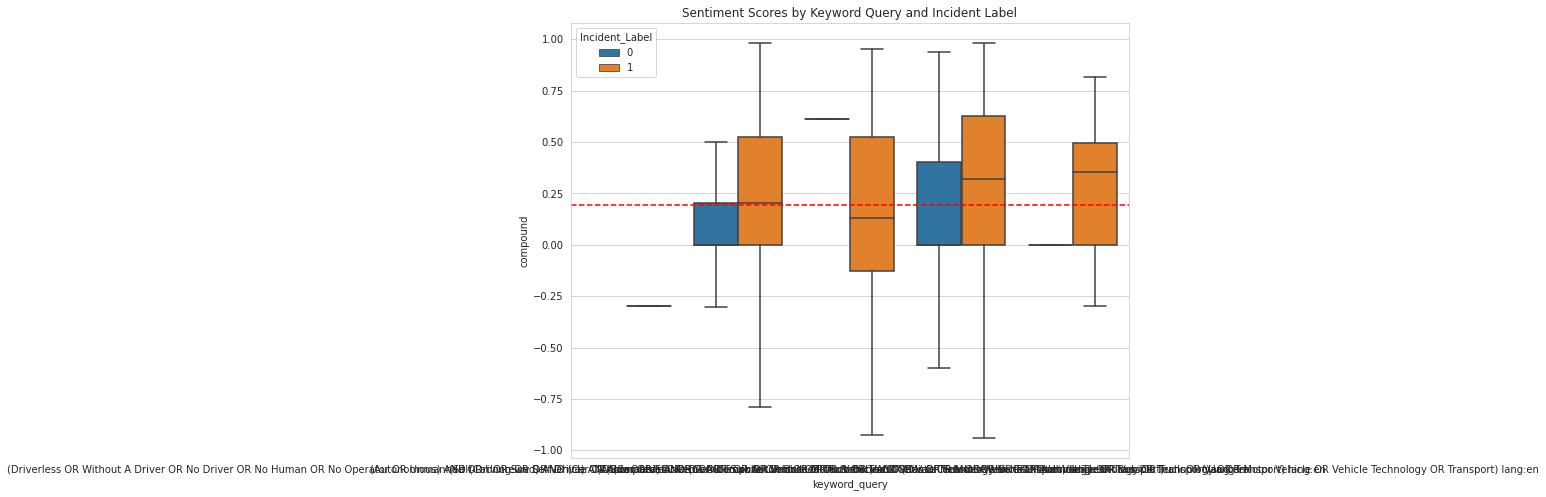

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='keyword_query', y='compound', hue='Incident_Label', data=df1, showfliers=False)
ax.axhline(avg_value, color='red', linestyle='--')
plt.title('Sentiment Scores by Keyword Query and Incident Label')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


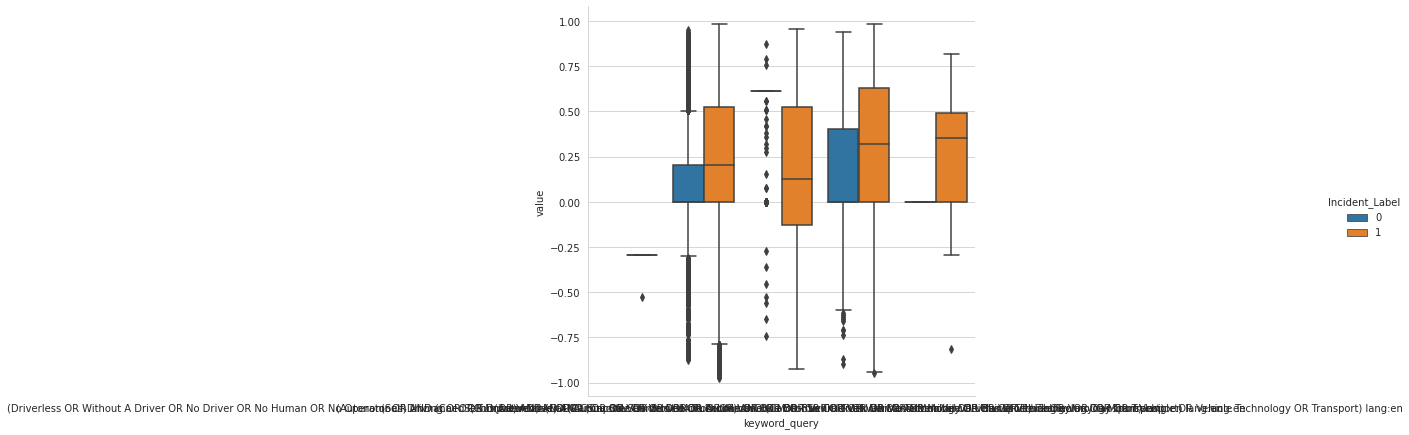

In [ ]:
melted_df = pd.melt(df1, id_vars=['keyword_query', 'Incident_Label'], value_vars = 'compound')
sns.catplot(x='keyword_query', y='value', hue='Incident_Label', data= melted_df, kind='box', ci=None, height=6, aspect=1, dodge=True)

In [ ]:
df1['keyword_query'].unique()

array(['(Driverless OR Without A Driver OR No Driver OR No Human OR No Operator OR Unmanned OR Uncrewed) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport)              lang:en',
       '(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
       '(Self-Driving OR Self Drive) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
       '(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
       '(Computer Driven OR Computer Controlled OR Robot) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en'],
      dtype=object)

In [ ]:
df1.groupby('keyword_query')['Incident_Label'].value_counts()

keyword_query                                                                                                                                                                                                                               Incident_Label
(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                                                                                    1                  2519
                                                                                                                                                                                                                                            0                  1395
(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                                                                            

In [ ]:
q3_df = df1.loc[(df1['keyword_query'] == '(Self-Driving OR Self Drive) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en') & (df1['Incident_Label'] == 0)]['compound']

In [ ]:
q3_df

26098   -0.7447
26099    0.5106
26100    0.7579
26101   -0.5574
26102    0.8720
          ...  
26350    0.0000
26351    0.3612
26352    0.3182
26353   -0.3595
26354    0.2732
Name: compound, Length: 257, dtype: float64

<ipython-input-24-bfba0b1e9935>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x = 'keyword_query', y = 'value', hue = 'sentiment', col = 'Incident_Label', data = melted_df1, kind='bar', ci = None, height=6, aspect=1, dodge=True)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


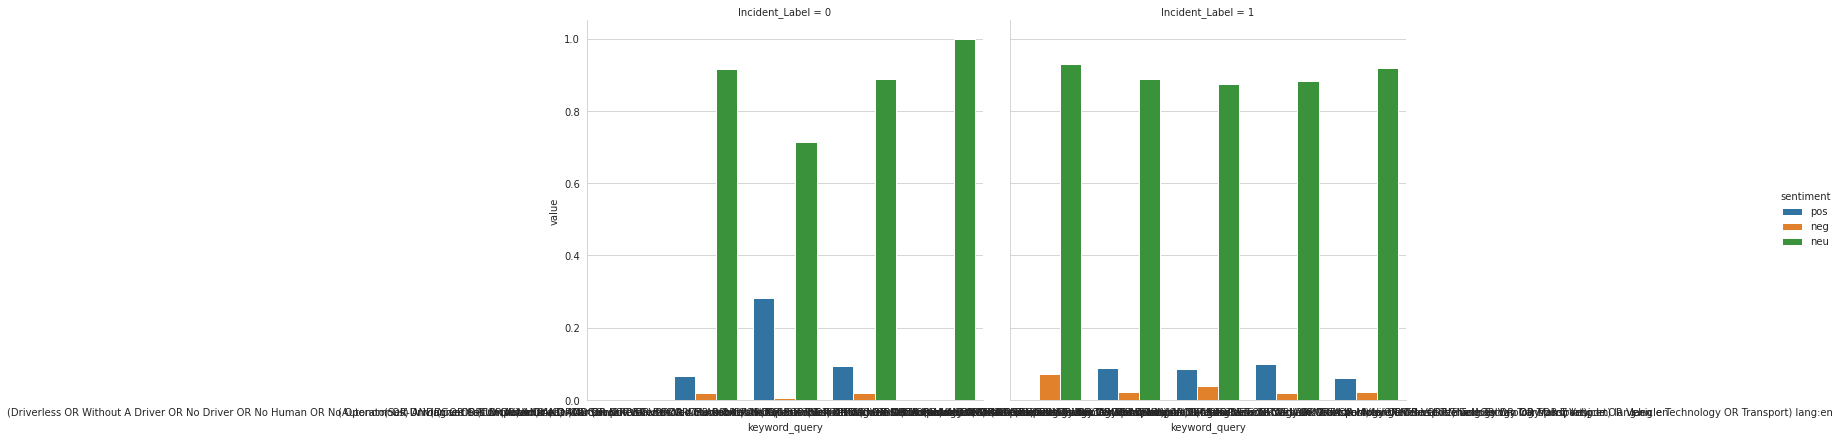

In [ ]:
melted_df1 = pd.melt(df1, id_vars = ['keyword_query', 'Incident_Label'], value_vars = ['pos', 'neg', 'neu'], var_name = 'sentiment')
sns.catplot(x = 'keyword_query', y = 'value', hue = 'sentiment', col = 'Incident_Label', data = melted_df1, kind='bar', ci = None, height=6, aspect=1, dodge=True)

In [ ]:
year_2018 = df1.loc[df1['Tweet_Date'].dt.year == 2018]

In [ ]:
year_2018

,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
13029,1079889924122464257,2018-12-31 23:59:55+00:00,ModConsumers,0,0,"Our year-end thoughts on 2018 cars? ""The coole...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"Our year-end thoughts on 2018 cars? ""The coole...",Positive,0.000,0.784,0.216,0.8885
13030,1079888637230227456,2018-12-31 23:54:49+00:00,arstechnica,7,3,"Our year-end thoughts on 2018 cars? ""The coole...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"Our year-end thoughts on 2018 cars? ""The coole...",Positive,0.000,0.784,0.216,0.8885
13031,1079838456380121089,2018-12-31 20:35:25+00:00,Automoblog,3,0,"""In 2016, @GM spent $1 billion to buy @Cruise ...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"""In 2016, spent $1 billion to buy Automation...",Neutral,0.000,1.000,0.000,0.0000
13032,1079789108338270208,2018-12-31 17:19:19+00:00,BennettResnik,1,0,“If China pursues #autonomous vehicle technolo...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,“If China pursues autonomous vehicle technolog...,Neutral,0.000,1.000,0.000,0.0000
13033,1079788526072414208,2018-12-31 17:17:00+00:00,InsideUnmanned,0,0,"@Aptiv, provider of the first autonomous drivi...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,", provider of the first autonomous driving tec...",Positive,0.000,0.912,0.088,0.4588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29018,947703507037118464,2018-01-01 05:38:18+00:00,ARYTIMES,0,0,"#INFO:\n/\n#ATM Automated Teller Machine, Air ...",(Automated) AND (Car OR Suv OR Vehicle OR Auto...,0,"INFO:\n/\nATM Automated Teller Machine, Air Tr...",Neutral,0.000,1.000,0.000,0.0000
30282,1070664215537565696,2018-12-06 13:00:15+00:00,NodrevGadget,0,0,Here's a game changer.\n\n#car #auto #mercedes...,(Computer Driven OR Computer Controlled OR Rob...,1,Here's a game changer.\n\ncar auto mercedes ta...,Neutral,0.000,1.000,0.000,0.0000
30283,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,(Computer Driven OR Computer Controlled OR Rob...,1,At Bovans Auto we use cutting edge technology ...,Positive,0.031,0.901,0.067,0.4019
30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,Neutral,0.000,1.000,0.000,0.0000


In [ ]:
queries = year_2018.groupby(['keyword_query', 'Incident_Label'])['Tweet_Date', 'Vader_sentiment'].value_counts()

<ipython-input-16-e134c694f411>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  queries = year_2018.groupby(['keyword_query', 'Incident_Label'])['Tweet_Date', 'Vader_sentiment'].value_counts()


In [ ]:
queries

keyword_query                                                                                                                                              Incident_Label  Tweet_Date                 Vader_sentiment
(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                   0               2018-01-25 13:10:20+00:00  Neutral            7
                                                                                                                                                                           2018-02-17 19:48:06+00:00  Negative           2
                                                                                                                                                                           2018-02-01 04:57:44+00:00  Neutral            2
                                                                                                                                 

In [ ]:
label = year_2018.groupby('keyword_query')['Incident_Label'].value_counts()

In [ ]:
label

keyword_query                                                                                                                                                                   Incident_Label
(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                        1                  564
                                                                                                                                                                                0                  145
(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                       1                 3631
                                                                                                                                                                                0                 1308
(Computer Dri

In [ ]:
total_label = df1.groupby('keyword_query')['Incident_Label'].value_counts()

In [ ]:
total_label

keyword_query                                                                                                                                                                                                                               Incident_Label
(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                                                                                    1                  2519
                                                                                                                                                                                                                                            0                  1395
(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en                                                                                            

In [ ]:
import matplotlib.pyplot as plt

lab_map = {'(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q1',
        '(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q2' ,
        '(Computer Driven OR Computer Controlled OR Robot) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q3',
        '(Driverless OR Without A Driver OR No Driver OR No Human OR No Operator OR Unmanned OR Uncrewed) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q4',
        '(Self-Driving OR Self Drive) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en' : 'Q5'
}

data = {'keyword_query': ['(Automated) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
                          '(Autonomous) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
                          '(Computer Driven OR Computer Controlled OR Robot) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
                          '(Driverless OR Without A Driver OR No Driver OR No Human OR No Operator OR Unmanned OR Uncrewed) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en',
                          '(Self-Driving OR Self Drive) AND (Car OR Suv OR Vehicle OR Automobile OR Bus OR Truck OR Van OR Motor Vehicle OR Vehicle Technology OR Transport) lang:en'],
        'After Incident': [2519, 16654, 17, 6, 257],
        'Before Incident': [1395, 9215, 2, 0, 223]}

d = pd.DataFrame(data)

#d['short_label'] = d.index.map(lab_map)

In [ ]:
d

,keyword_query,After Incident,Before Incident
0,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,2519,1395
1,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,16654,9215
2,(Computer Driven OR Computer Controlled OR Rob...,17,2
3,(Driverless OR Without A Driver OR No Driver O...,6,0
4,(Self-Driving OR Self Drive) AND (Car OR Suv O...,257,223


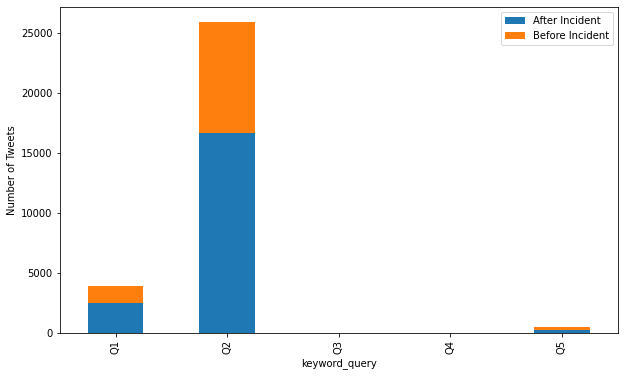

In [ ]:
d.set_index('keyword_query', inplace=True)
d = d.rename(index = lab_map)

ax = d.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Number of Tweets')
ax.legend(['After Incident', 'Before Incident'], loc='best')
plt.show()

<ipython-input-28-d149699b5107>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)


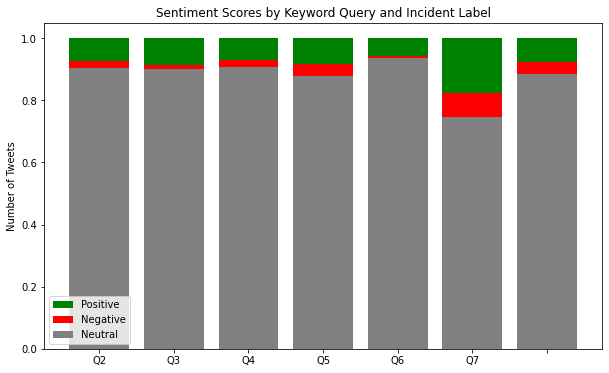

In [ ]:
grouped = year_2018.groupby(['keyword_query', 'Incident_Label'])

fig, ax = plt.subplots(figsize=(10, 6))

x_labels = ['Q{}'.format(i+1) for i in range(len(grouped))]
ax.set_xticklabels(x_labels)
ax.set_ylabel('Number of Tweets')
ax.set_title('Sentiment Scores by Keyword Query and Incident Label')
legend_labels = ['Positive', 'Negative', 'Neutral']

for i, ((keyword_query, label), group) in enumerate(grouped):
    # calculate the total number of tweets for this group
    total_tweets = group['pos'].sum() + group['neg'].sum() + group['neu'].sum()

    # calculate the percentage of tweets with positive, negative, and neutral sentiment
    pos_perc = group['pos'].sum() / total_tweets
    neg_perc = group['neg'].sum() / total_tweets
    neu_perc = group['neu'].sum() / total_tweets

    # plot the bars
    ax.bar(i, pos_perc, bottom=neg_perc+neu_perc, color='green')
    ax.bar(i, neg_perc, bottom=neu_perc, color='red')
    ax.bar(i, neu_perc, color='gray')

# add the legend
ax.legend(legend_labels, loc='best')

plt.show()

In [ ]:
year_2018

,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
13029,1079889924122464257,2018-12-31 23:59:55+00:00,ModConsumers,0,0,"Our year-end thoughts on 2018 cars? ""The coole...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"Our year-end thoughts on 2018 cars? ""The coole...",Positive,0.000,0.784,0.216,0.8885
13030,1079888637230227456,2018-12-31 23:54:49+00:00,arstechnica,7,3,"Our year-end thoughts on 2018 cars? ""The coole...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"Our year-end thoughts on 2018 cars? ""The coole...",Positive,0.000,0.784,0.216,0.8885
13031,1079838456380121089,2018-12-31 20:35:25+00:00,Automoblog,3,0,"""In 2016, @GM spent $1 billion to buy @Cruise ...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"""In 2016, spent $1 billion to buy Automation...",Neutral,0.000,1.000,0.000,0.0000
13032,1079789108338270208,2018-12-31 17:19:19+00:00,BennettResnik,1,0,“If China pursues #autonomous vehicle technolo...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,“If China pursues autonomous vehicle technolog...,Neutral,0.000,1.000,0.000,0.0000
13033,1079788526072414208,2018-12-31 17:17:00+00:00,InsideUnmanned,0,0,"@Aptiv, provider of the first autonomous drivi...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,", provider of the first autonomous driving tec...",Positive,0.000,0.912,0.088,0.4588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29018,947703507037118464,2018-01-01 05:38:18+00:00,ARYTIMES,0,0,"#INFO:\n/\n#ATM Automated Teller Machine, Air ...",(Automated) AND (Car OR Suv OR Vehicle OR Auto...,0,"INFO:\n/\nATM Automated Teller Machine, Air Tr...",Neutral,0.000,1.000,0.000,0.0000
30282,1070664215537565696,2018-12-06 13:00:15+00:00,NodrevGadget,0,0,Here's a game changer.\n\n#car #auto #mercedes...,(Computer Driven OR Computer Controlled OR Rob...,1,Here's a game changer.\n\ncar auto mercedes ta...,Neutral,0.000,1.000,0.000,0.0000
30283,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,(Computer Driven OR Computer Controlled OR Rob...,1,At Bovans Auto we use cutting edge technology ...,Positive,0.031,0.901,0.067,0.4019
30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,Neutral,0.000,1.000,0.000,0.0000


In [ ]:
grouped = year_2018.groupby(['keyword_query', 'Incident_Label'])

In [ ]:
len(grouped)

7

In [ ]:
df

,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_Scores,Vader_sentiment
0,1543970431241097216,2022-07-04 14:50:11+00:00,CodeWriter23,5,0,@krankenschreibe @wil_da_beast630 4/\n137.04.C...,(Driverless OR Without A Driver OR No Driver O...,1,4/\n137.04.C Except as otherwise permitted b...,"{'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...",Negative
1,1536744779157053440,2022-06-14 16:18:01+00:00,Exacerbater1,0,0,@WDeepkimchi @Tim_Kiper @Timcast 2923.16 of th...,(Driverless OR Without A Driver OR No Driver O...,1,"2923.16 of the revised code.\n\n""(B) No per...","{'neg': 0.055, 'neu': 0.945, 'pos': 0.0, 'comp...",Negative
2,1536690787668434944,2022-06-14 12:43:28+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...","{'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...",Negative
3,1536687905497817089,2022-06-14 12:32:01+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...","{'neg': 0.062, 'neu': 0.937, 'pos': 0.0, 'comp...",Negative
4,1328009560175546371,2020-11-15 16:18:47+00:00,EthereanTrading,0,0,@richardfowler @cleveland19news @MAJTOURE No p...,(Driverless OR Without A Driver OR No Driver O...,1,No person shall knowingly transport or have...,"{'neg': 0.064, 'neu': 0.936, 'pos': 0.0, 'comp...",Negative
...,...,...,...,...,...,...,...,...,...,...,...
30283,1054387124139683840,2018-10-22 15:00:54+00:00,BovansS,0,0,At Bovans Auto we use cutting edge technology ...,(Computer Driven OR Computer Controlled OR Rob...,1,At Bovans Auto we use cutting edge technology ...,"{'neg': 0.031, 'neu': 0.901, 'pos': 0.067, 'co...",Positive
30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
30285,976396588498251776,2018-03-21 09:54:21+00:00,SwampYankeeTN,0,0,@GordonDeal Regarding self driving cars: This ...,(Computer Driven OR Computer Controlled OR Rob...,1,Regarding self driving cars: This is technolo...,"{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...",Positive
30286,885681235065962496,2017-07-14 02:03:56+00:00,DaWholeTwuth,0,1,"Bye-bye, Firefly: Waymo retires its autonomous...",(Computer Driven OR Computer Controlled OR Rob...,0,"Bye-bye, Firefly: Waymo retires its autonomous...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [ ]:
df1['Tweet_Date'] = pd.to_datetime(df1['Tweet_Date'])

In [ ]:
no_years = df1['Tweet_Date'].dt.year

In [ ]:
no_years = df1['Tweet_Date'].dt.year.unique()
no_years

array([2022, 2020, 2023, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009])

In [ ]:
no_years = df['Tweet_Date'].dt.year.unique()
no_years

years_df = []
for i, yr in enumerate(no_years):
  yr_df = df.loc[df['Tweet_Date'].dt.year == yr]
  yr_df = yr_df.reset_index()
  print(f"{yr} dataframe")
  years_df.append(yr_df)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.figure(figsize = (25, 20))
for idx, year in enumerate(years_df):
  plt.subplot(5, 4, idx + 1)
  sns.distplot(year['Tweet_Date'])
  plt.xlabel(f"{year}")
  plt.ylabel("distrubution")
  plt.title(f"{year} distribution")

plt.tight_layout()

In [ ]:
years_df = []
for i, yr in enumerate(no_years):
  yr_df = df1.loc[df1['Tweet_Date'].dt.year == yr]
  yr_df = yr_df.reset_index()
  print(f"{yr} dataframe added")
  years_df.append(yr_df)

2022 dataframe added
2020 dataframe added
2023 dataframe added
2021 dataframe added
2019 dataframe added
2018 dataframe added
2017 dataframe added
2016 dataframe added
2015 dataframe added
2014 dataframe added
2013 dataframe added
2012 dataframe added
2011 dataframe added
2010 dataframe added
2009 dataframe added


In [ ]:
years_df[0]

,index,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
0,0,1543970431241097216,2022-07-04 14:50:11+00:00,CodeWriter23,5,0,@krankenschreibe @wil_da_beast630 4/\n137.04.C...,(Driverless OR Without A Driver OR No Driver O...,1,4/\n137.04.C Except as otherwise permitted b...,Negative,0.053,0.947,0.000,-0.2960
1,1,1536744779157053440,2022-06-14 16:18:01+00:00,Exacerbater1,0,0,@WDeepkimchi @Tim_Kiper @Timcast 2923.16 of th...,(Driverless OR Without A Driver OR No Driver O...,1,"2923.16 of the revised code.\n\n""(B) No per...",Negative,0.055,0.945,0.000,-0.2960
2,2,1536690787668434944,2022-06-14 12:43:28+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
3,3,1536687905497817089,2022-06-14 12:32:01+00:00,Exacerbater1,0,0,"@WDeepkimchi @Tim_Kiper @Timcast ""(B) No perso...",(Driverless OR Without A Driver OR No Driver O...,1,"""(B) No person shall knowingly transport or...",Negative,0.062,0.937,0.000,-0.2960
4,312,1609324088815755265,2022-12-31 23:02:17+00:00,NooraniShabnam,0,0,Your next Las Vegas Uber ride may not have a d...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,Your next Las Vegas Uber ride may not have a d...,Positive,0.000,0.882,0.118,0.6222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,26780,1478195831471845380,2022-01-04 02:45:24+00:00,EricPaulDennis,4,0,This will be my last update for this tracker. ...,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,1,This will be my last update for this tracker. ...,Positive,0.000,0.943,0.057,0.3818
3017,26781,1478050519637766144,2022-01-03 17:07:59+00:00,bicycal_life,0,0,@JackJackProduct As in automated vehicles? The...,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,1,As in automated vehicles? The technology is n...,Neutral,0.000,1.000,0.000,0.0000
3018,26782,1477478779891167232,2022-01-02 03:16:06+00:00,KileyCirus,0,0,@jordanbpeterson I can literally transport ene...,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,1,I can literally transport energy my automated...,Positive,0.000,0.792,0.208,0.2732
3019,30270,1585296202018455553,2022-10-26 15:44:02+00:00,WWLAMFM,0,0,Imagine seeing a convoy of trucks—3-to-6 sets ...,(Computer Driven OR Computer Controlled OR Rob...,1,Imagine seeing a convoy of trucks—3-to-6 sets ...,Positive,0.000,0.897,0.103,0.4939


In [ ]:
counts = years_df[0].groupby(['Vader_sentiment', 'Tweet_Date']).value_counts()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

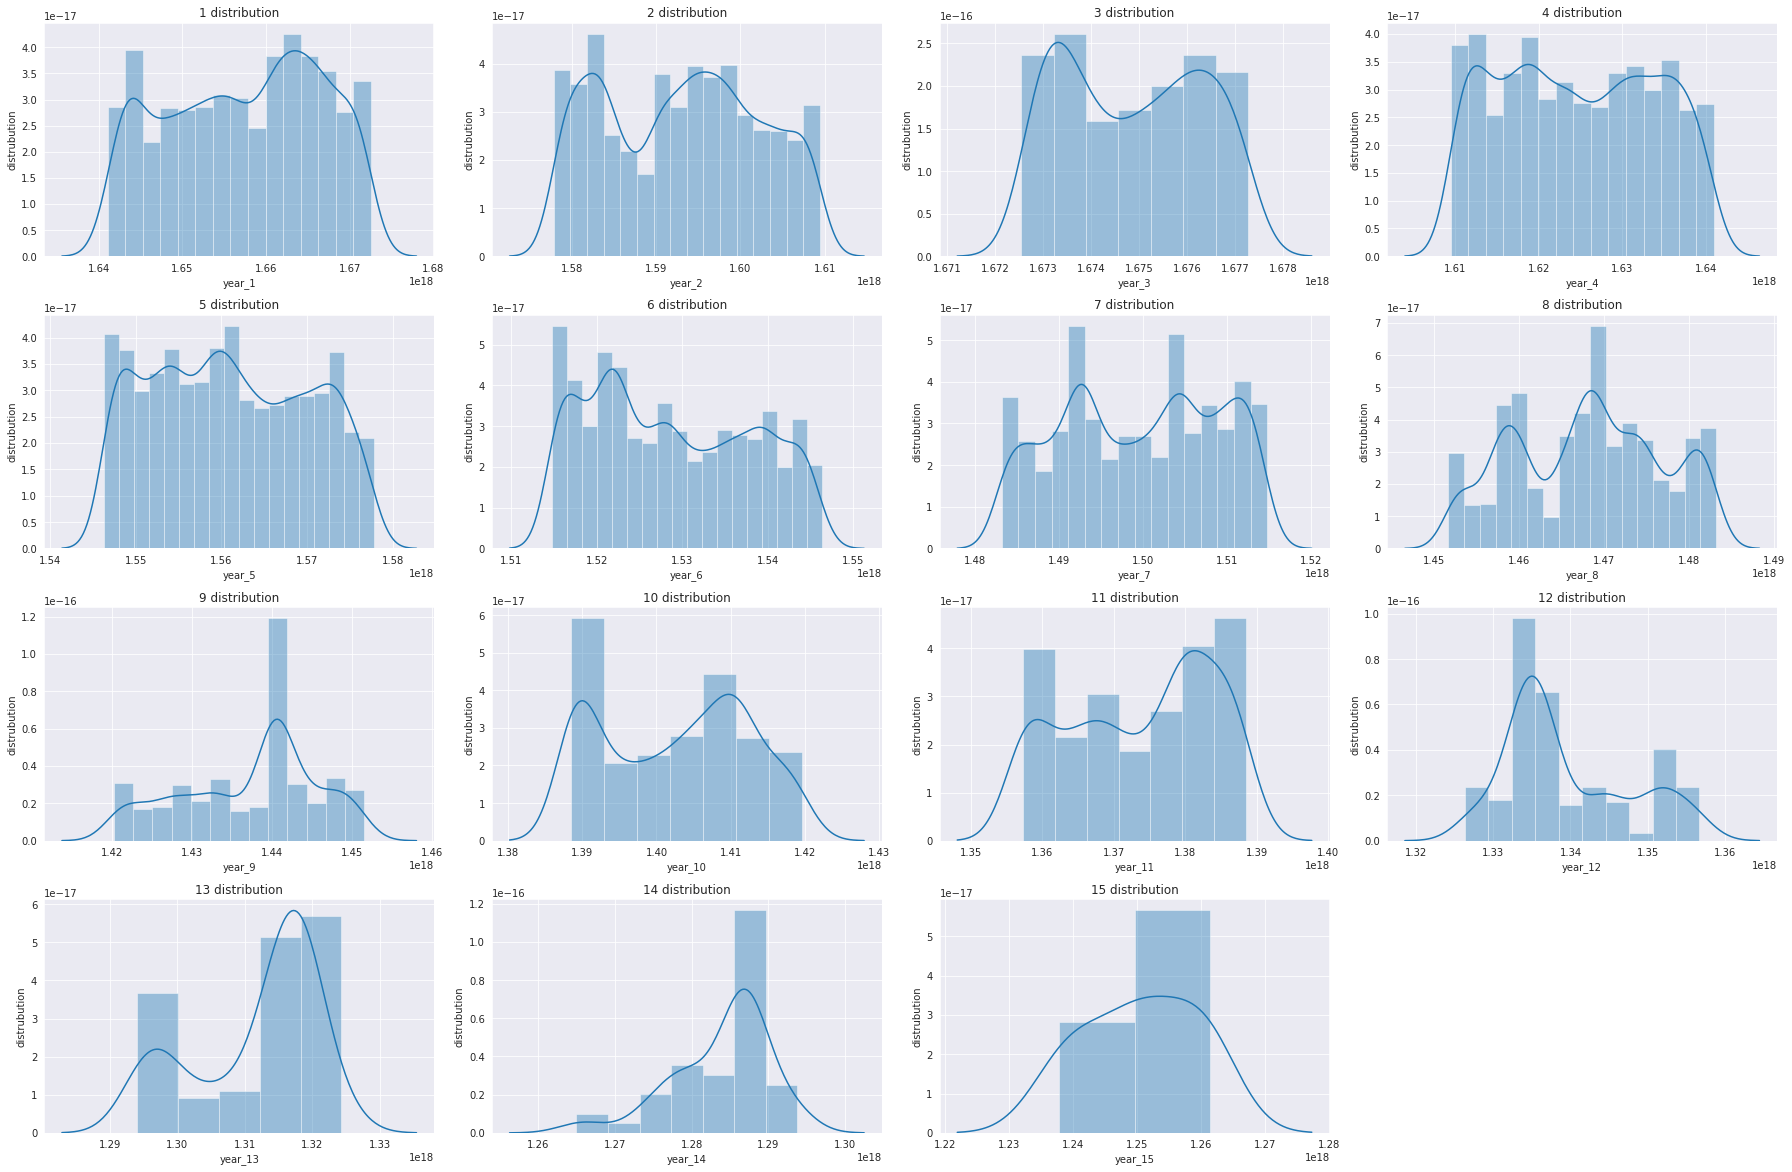

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
plt.figure(figsize = (25, 20))
for idx, year in enumerate(years_df):
  ax = plt.subplot(5, 4, idx + 1)
  sns.distplot(year['Tweet_Date'])
  plt.xlabel(f"year_{idx+1}")
  plt.ylabel("distrubution")
  plt.title(f"{idx+1} distribution")

  #ax.set_xticklabels(year['Tweet_Date'].dt.strftime('%Y-%m-%d').unique(), rotation=45)

plt.tight_layout()

In [ ]:
df1['Tweet_Date'].dt.year.value_counts()

2018    5695
2019    4720
2020    3865
2017    3805
2016    3349
2021    3213
2022    3021
2015     887
2014     545
2013     383
2023     363
2012     292
2011      90
2010      48
2009      12
Name: Tweet_Date, dtype: int64

In [ ]:
year_2018 = df1.loc[df1['Tweet_Date'].dt.year == 2018]

In [ ]:
uber_df = year_2018.loc[(year_2018['Tweet_Date'] >= '2018-01-01') & (year_2018['Tweet_Date'] < '2018-07-01')]

In [ ]:
uber_df

,TweetID,Tweet_Date,Tweet_Author,Tweet_Likes,Retweets,Tweet_Text,keyword_query,Incident_Label,Vader_CleanTweet,Vader_sentiment,neg,neu,pos,compound
15030,1012915892324143105,2018-06-30 04:29:02+00:00,kcsinclair,1,0,"Had a Tesla Experience with a Model S today, i...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"Had a Tesla Experience with a Model S today, i...",Positive,0.069,0.716,0.215,0.7425
15031,1012845942624514049,2018-06-29 23:51:05+00:00,Business380,0,1,U.S. won’t mandate autonomous-vehicle technolo...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,U.S. won’t mandate autonomous-vehicle technolo...,Neutral,0.000,1.000,0.000,0.0000
15032,1012827115492970497,2018-06-29 22:36:16+00:00,profdmcinnes,1,0,"RT autoTsolutions ""US won’t mandate autonomous...",(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,"RT autoTsolutions ""US won’t mandate autonomous...",Neutral,0.000,1.000,0.000,0.0000
15033,1012826823426633729,2018-06-29 22:35:06+00:00,autoTsolutions,0,0,US won’t mandate autonomous-vehicle technology...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,US won’t mandate autonomous-vehicle technology...,Neutral,0.000,1.000,0.000,0.0000
15034,1012734900019945472,2018-06-29 16:29:50+00:00,kenwardcdw,0,0,FutureStructure shares how autonomous vehicle ...,(Autonomous) AND (Car OR Suv OR Vehicle OR Aut...,1,FutureStructure shares how autonomous vehicle ...,Positive,0.000,0.765,0.235,0.5106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29016,948487722448097282,2018-01-03 09:34:29+00:00,McGinleyTony,0,0,@Emma__Ward From what I’ve read and heard from...,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,0,From what I’ve read and heard from the insura...,Negative,0.136,0.864,0.000,-0.7096
29017,948107941537759232,2018-01-02 08:25:22+00:00,ChainwayIndia,0,0,Automated vehicle identification with RFID &am...,(Automated) AND (Car OR Suv OR Vehicle OR Auto...,0,Automated vehicle identification with RFID &am...,Neutral,0.000,1.000,0.000,0.0000
29018,947703507037118464,2018-01-01 05:38:18+00:00,ARYTIMES,0,0,"#INFO:\n/\n#ATM Automated Teller Machine, Air ...",(Automated) AND (Car OR Suv OR Vehicle OR Auto...,0,"INFO:\n/\nATM Automated Teller Machine, Air Tr...",Neutral,0.000,1.000,0.000,0.0000
30284,1003565265781698560,2018-06-04 09:12:59+00:00,lwhittaker86,11,3,Year 5 are about to embark upon Control Techno...,(Computer Driven OR Computer Controlled OR Rob...,1,Year 5 are about to embark upon Control Techno...,Neutral,0.000,1.000,0.000,0.0000


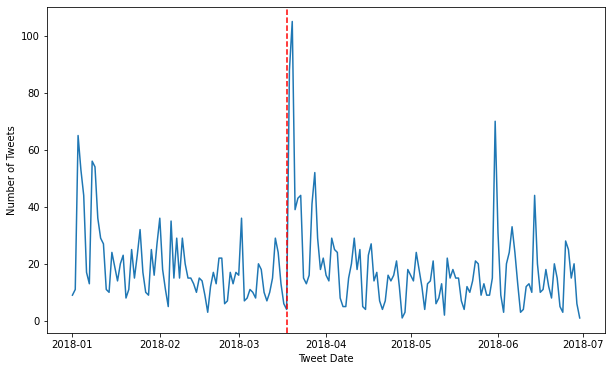

In [ ]:
import matplotlib.pyplot as plt

uber = uber_df.set_index('Tweet_Date')

# Compute the number of tweets per day
tweet_counts = uber.resample('D').count()['Vader_sentiment']

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tweet_counts.index, tweet_counts)
ax.set_xlabel('Tweet Date')
ax.set_ylabel('Number of Tweets')

incident_date = pd.to_datetime('2018-03-18')
ax.axvline(incident_date, color='red', linestyle='--')

plt.show()

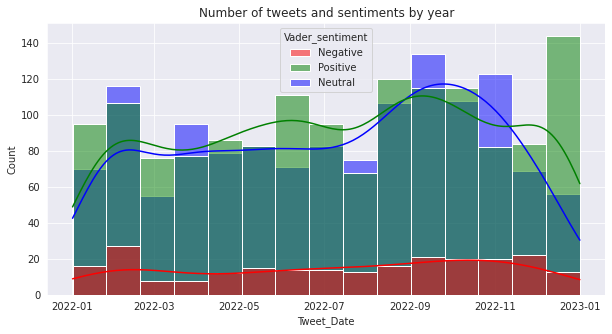

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=years_df[0].Tweet_Date,hue=years_df[0].Vader_sentiment,legend=True,palette=["red","green","blue"],kde=True).set(title="Number of tweets and sentiments by year")
#sns.rugplot(years_df[0].Tweet_Date)
plt.show()

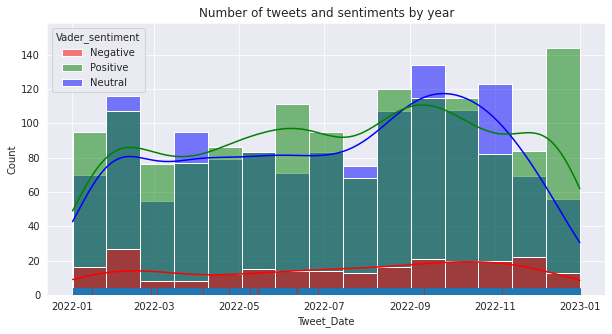

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x=years_df[0].Tweet_Date,hue=years_df[0].Vader_sentiment,legend=True,palette=["red","green","blue"],kde=True).set(title="Number of tweets and sentiments by year")
sns.rugplot(years_df[0].Tweet_Date)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


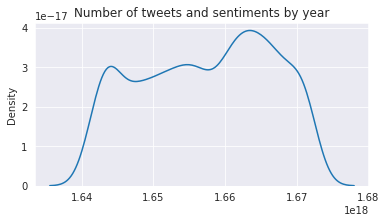

In [ ]:
plt.figure(figsize=(6,3))
sns.distplot(x=years_df[0].Tweet_Date,
             #hue=years_df[0].Vader_sentiment,
             hist = False,
             #legend=True,
             #palette=["red","green","blue"],
             kde=True).set(title="Number of tweets and sentiments by year")
plt.show()

<AxesSubplot:xlabel='Tweet_Date', ylabel='Density'>

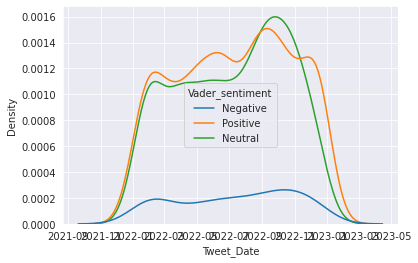

In [ ]:
sns.kdeplot(x=years_df[0]['Tweet_Date'], hue = years_df[0]['Vader_sentiment'] )

In [ ]:
counts = years_df[0].groupby(['Vader_sentiment', 'Tweet_Date']).value_counts()

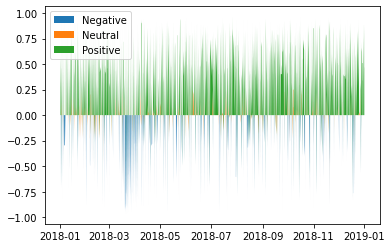

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

grouped = year_2018.groupby(['Vader_sentiment', 'Tweet_Date'])['compound'].mean()

# Extract the unique sentiment categories and tweet dates from the grouped data
sentiments = grouped.index.levels[0]
dates = grouped.index.levels[1]

# Create a matrix of sentiment scores for each sentiment category and tweet date
score_matrix = np.zeros((len(sentiments), len(dates)))
for i, sentiment in enumerate(sentiments):
    for j, date in enumerate(dates):
        if (sentiment, date) in grouped.index:
            score_matrix[i,j] = grouped[(sentiment, date)]

# Plot the stackplot
fig, ax = plt.subplots()
ax.stackplot(dates, score_matrix, labels=sentiments)
ax.legend(loc='upper left')
plt.show()

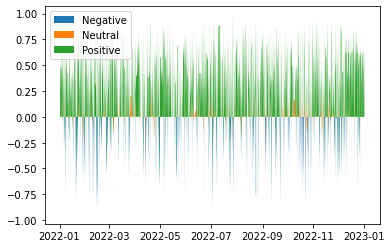

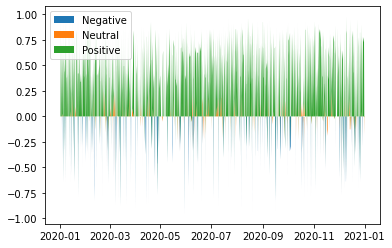

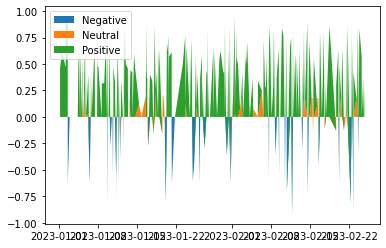

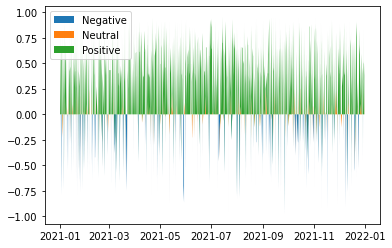

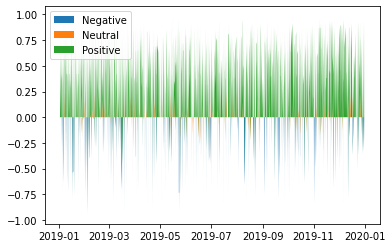

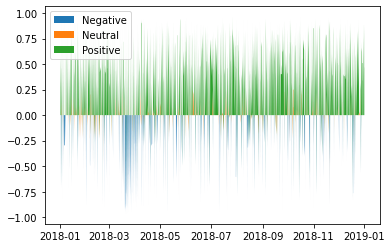

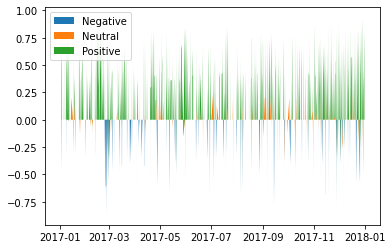

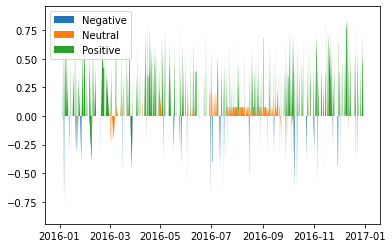

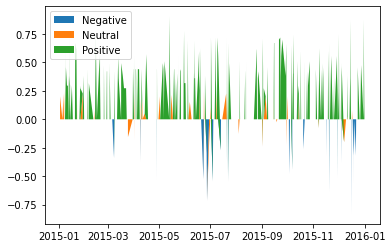

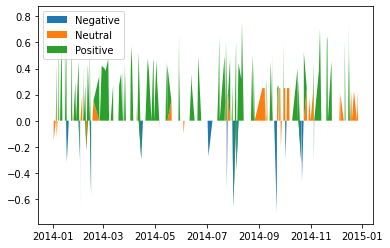

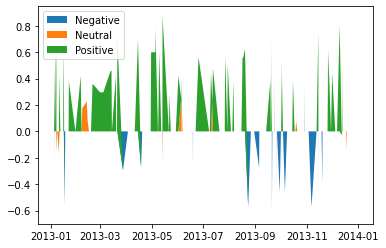

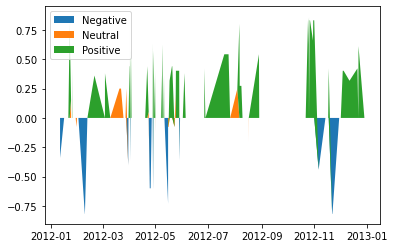

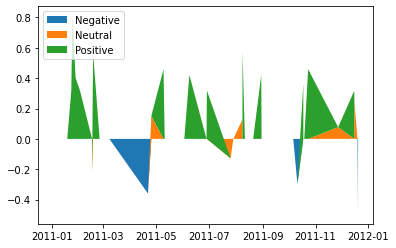

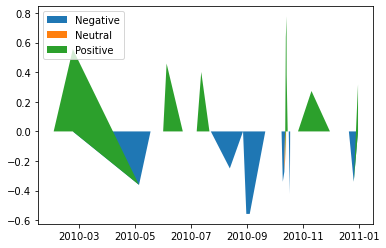

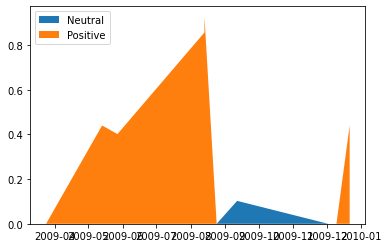

In [ ]:
for idx, year in enumerate(years_df):
  grouped = year.groupby(['Vader_sentiment', 'Tweet_Date'])['compound'].mean()

  sentiments = grouped.index.levels[0]
  dates = grouped.index.levels[1]

  score_matrix = np.zeros((len(sentiments), len(dates)))
  for i, sentiment in enumerate(sentiments):
      for j, date in enumerate(dates):
          if (sentiment, date) in grouped.index:
              score_matrix[i,j] = grouped[(sentiment, date)]

  plt.stackplot(dates, score_matrix, labels=sentiments)
  plt.legend(loc='upper left')
  plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize = (25, 20))

for idx, year in enumerate(years_df):
  grouped = year.groupby(['Vader_sentiment', 'Tweet_Date'])['compound'].mean()

  sentiments = grouped.index.levels[0]
  dates = grouped.index.levels[1]

  score_matrix = np.zeros((len(sentiments), len(dates)))
  for i, sentiment in enumerate(sentiments):
      for j, date in enumerate(dates):
          if (sentiment, date) in grouped.index:
              score_matrix[i,j] = grouped[(sentiment, date)]
  #fig, ax = plt.subplots()
  plt.subplot(5, 3, idx + 1)
  plt.stackplot(dates, score_matrix, labels=sentiments)
  plt.legend(loc='upper left')
  plt.show()

plt.tight_layout()

In [ ]:
print(year_2018.groupby(['Vader_sentiment', 'Tweet_Date'])['compound'].mean())

Vader_sentiment  Tweet_Date               
Negative         2018-01-01 03:45:38+00:00   -0.6808
                 2018-01-03 09:34:29+00:00   -0.7096
                 2018-01-03 14:00:46+00:00   -0.8126
                 2018-01-03 14:06:25+00:00   -0.5994
                 2018-01-03 14:06:47+00:00   -0.5994
                                               ...  
Positive         2018-12-31 14:00:00+00:00    0.7650
                 2018-12-31 14:34:29+00:00    0.4767
                 2018-12-31 17:17:00+00:00    0.4588
                 2018-12-31 23:54:49+00:00    0.8885
                 2018-12-31 23:59:55+00:00    0.8885
Name: compound, Length: 5579, dtype: float64


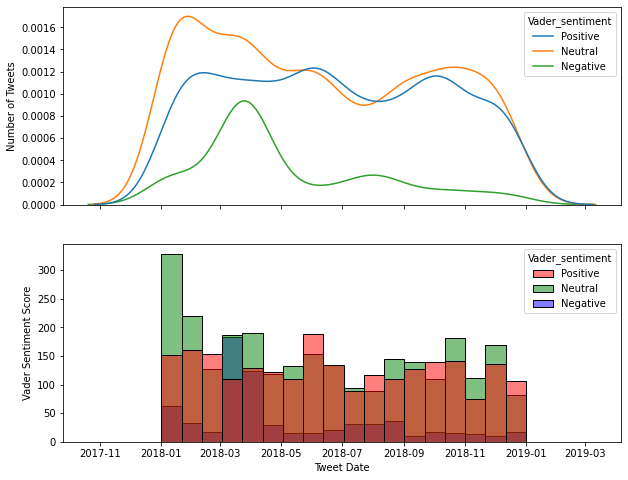

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot the number of tweets on the first subplot
#ax1.plot(year_2018['Tweet_Date'], year_2018['compound'], color='blue')
sns.kdeplot(x=year_2018['Tweet_Date'], hue = year_2018['Vader_sentiment'], ax = ax1)
ax1.set_ylabel('Number of Tweets')

# Plot the Vader sentiment scores on the second subplot
#ax2.plot(df['Tweet_Date'], df['Vader_Sentiment'], color='red')
sns.histplot(x=year_2018.Tweet_Date,hue=year_2018.Vader_sentiment,legend=True,palette=["red","green","blue"],kde=False, ax=ax2)
ax2.set_ylabel('Vader Sentiment Score')

# Set the x-axis label
plt.xlabel('Tweet Date')

# Show the plot
plt.show()